In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.drop('User ID',axis=1,inplace = True )

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df = pd.get_dummies(df,drop_first= True)

In [8]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [9]:
X= df.loc[:,['Age','EstimatedSalary','Gender_Male']].values
Y= df.loc[:,['Purchased']].values

In [10]:
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]], dtype=int64)

In [11]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [12]:
Y= Y.reshape(-1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
acc_list=[]
err_list=[]
for i in range(1,25):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred= model.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

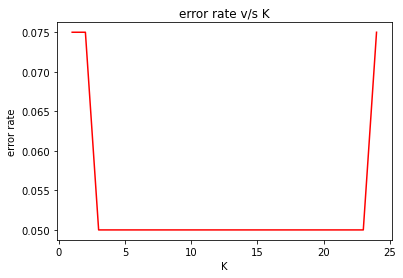

In [18]:
plt.plot(list(range(1,25)),err_list,c='r')
plt.title('error rate v/s K')
plt.xlabel('K')
plt.ylabel('error rate')
plt.show()

In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [29]:
confusion_matrix(Y_test,Y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [30]:
accuracy_score(Y_test,Y_pred)

0.95